**LIBRERIAS**

In [1]:
from InstagramAPI import InstagramAPI
import pandas as pd
from pandas.io.json import json_normalize
import json
from time import sleep
from datetime import datetime

Fail to import moviepy. Need only for Video upload.


**LOG IN A LA CUENTA**

In [ ]:
api = InstagramAPI("user", "password")
api.login()

**ACTIVIDAD RECIENTE DE LA CUENTA**

In [ ]:
api.getRecentActivity()
get_recent_activity_response= api.LastJson 
for notifcation in get_recent_activity_response['old_stories']:
    print(notifcation['args']['text'])

**CONSULTAR ACTIVIDAD DE UN SEGUIDOR ESPECIFICX**

In [4]:
username="merevequoz"
for notifcation in get_recent_activity_response['old_stories']:
    text = notifcation['args']['text']
    if username  in text:
        print (text)

merevequoz liked your photo.


**SOLO PARA DEJAR DE SEGUIR A QUIENES NO SIGAN A LA CUENTA**

**OTRO CODIGO**


**CONSEGUIR TOTAL DE POSTEOS**

In [5]:
import time
def get_my_posts(api):
    '''Retrieve all posts from own profile'''
    my_posts = []
    has_more_posts = True
    max_id= ''

    while has_more_posts:
        api.getSelfUserFeed(maxid=max_id)
        if api.LastJson['more_available'] is not True:
            has_more_posts = False #stop condition

        max_id = api.LastJson.get('next_max_id','')
        my_posts.extend(api.LastJson['items']) #merge lists
        time.sleep(2) # slows down to avoid flooding

        if has_more_posts:
            print(str(len(my_posts)) + ' posts retrieved so far...')

    print('Total posts retrieved: ' + str(len(my_posts)))
    
    return my_posts

my_posts = get_my_posts(api)

18 posts retrieved so far...
36 posts retrieved so far...
54 posts retrieved so far...
72 posts retrieved so far...
90 posts retrieved so far...
108 posts retrieved so far...
126 posts retrieved so far...
144 posts retrieved so far...
Total posts retrieved: 151


**RECOGE INFO DE TODOS LOS LIKES DE TODOS LOS POSTEOS**

In [6]:
def get_posts_likers(api, my_posts):
    '''Retrieve all likers on all posts'''
    
    likers = []
    
    print('wait %.1f minutes' % (len(my_posts)*2/60.))
    for i in range(len(my_posts)):
        m_id = my_posts[i]['id']
        api.getMediaLikers(m_id)
        
        likers += [api.LastJson]
        
        # Include post_id in likers dict list
        likers[i]['post_id'] = m_id
        
        time.sleep(2)
    print('done')
    
    return likers


likers = get_posts_likers(api, my_posts)  

wait 5.0 minutes
done


In [7]:
def get_liked_media (api, my_posts):
    '''Retrieve all likers on all posts'''
    
    likes = []
    
    print('wait %.1f minutes' % (len(my_posts)*2/60.))
    for i in range(len(my_posts)):
        m_id = my_posts[i]['id']
        api.getLikedMedia(m_id)
        
        likes += [api.LastJson]
        
        # Include post_id in likers dict list
        likes[i]['post_id'] = m_id
        
        time.sleep(2)
    print('done')
    
    return likes


liked_media = get_liked_media(api, my_posts)  

wait 5.0 minutes
done


In [8]:
def posts_likers_to_df(liked_media):
    '''Transforms likers list of dicts into pandas DataFrame'''
    
    # Normalize likers by getting the 'users' list and the post_id of each like
    df_likers = pd.json_normalize(liked_media, 'users', ['post_id'])
    
    # Add 'content_type' column to know the rows are likes
    df_likers['content_type'] = 'like'
    
    return df_likers

df_liked_media = posts_likers_to_df(likers)

**RECIBE TODOS LOS COMENTARIOS EN TODOS LOS POSTEOS**

In [9]:
def get_posts_commenters(api, my_posts):
    '''Retrieve all commenters on all posts '''
    
    commenters = []
    
    print('wait %.1f minutes' % (len(my_posts)*2/60.))
    for i in range(len(my_posts)):
        m_id = my_posts[i]['id']
        api.getMediaComments(m_id)
        
        commenters += [api.LastJson]
        
        # Include post_id in commenters dict list
        commenters[i]['post_id'] = m_id
            
        time.sleep(2)
    print('done')
    
    return commenters

commenters = get_posts_commenters(api, my_posts)

wait 5.0 minutes
done


**CONVIERTE TODOS LOS LIKES Y LOS COMENTARIOS EN UN DATAFRAME**

In [ ]:
def posts_likers_to_df(likers):
    '''Transforms likers list of dicts into pandas DataFrame'''
    
    # Normalize likers by getting the 'users' list and the post_id of each like
    df_likers = pd.json_normalize(likers, 'users', ['post_id'])
    
    # Add 'content_type' column to know the rows are likes
    df_likers['content_type'] = 'like'
    
    return df_likers

def posts_commenters_to_df(commenters):
    '''Transforms commenters list of dicts into pandas DataFrame'''
    
    # Include username and full_name of commenter in 'comments' list of dicts
    for i in range(len(commenters)):
        if len(commenters[i]['comments']) > 0: # checks if there is any comment on the post
            for j in range(len(commenters[i]['comments'])):
                # Puts username/full_name one level up
                commenters[i]['comments'][j]['username'] = commenters[i]['comments'][j]['user']['username']
                commenters[i]['comments'][j]['full_name'] = commenters[i]['comments'][j]['user']['full_name']
                
    # Create DataFrame
    # Normalize commenters to have 1 row per comment, and gets 'post_id' from parent 
    df_commenters = pd.json_normalize(commenters, 'comments', 'post_id')
    
    # Get rid of 'user' column as we already handled it above
    #del df_commenters['user']
    
    return df_commenters

df_likers = posts_likers_to_df(likers)
df_commenters = posts_commenters_to_df(commenters)
df_likers.head(10)

In [ ]:
df_commenters.head(10)

In [ ]:
print(df_likers.latest_reel_media)

# **INFO FINAL**

In [13]:
print('Total posts: ' + str(len(my_posts)))
print('---------')
print('Total likes en perfil: ' + str(df_likers.shape[0])) #shape[0] represents number of rows
print('Usuarios particulares que likearon tus posts: ' +str(df_likers.username.nunique())) # nunique() will count distinct values of a col
print('---------')
print('Total comentarios en perfil: ' + str(df_commenters.shape[0]))
print('Usuarios particulares que comentaron tus posts: ' +str(df_commenters.username.nunique()))

Total posts: 151
---------
Total likes en perfil: 5031
Usuarios particulares que likearon tus posts: 1837
---------
Total comentarios en perfil: 130
Usuarios particulares que comentaron tus posts: 75


# **10 USUARIOS QUE MAS LIKES DAN**

In [ ]:
df_likers.username.value_counts()[:10]

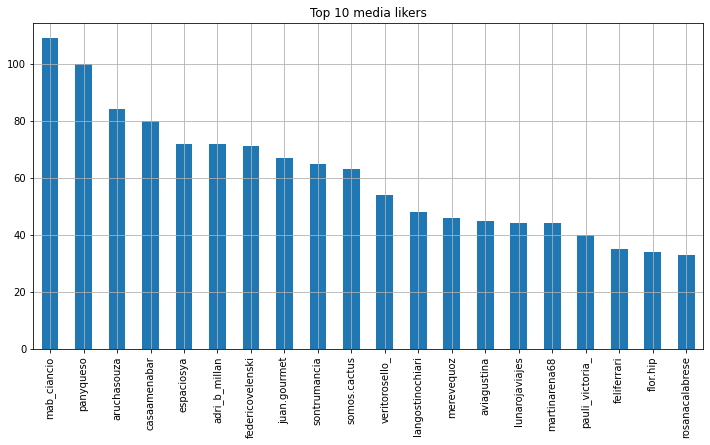

In [15]:
df_likers.username.value_counts()[:20].plot(kind='bar', title='Top 10 media likers', grid=True, figsize=(12,6))

# **10 USUARIOS QUE MAS COMENTAN**

In [ ]:
df_commenters.username.value_counts()[:20]

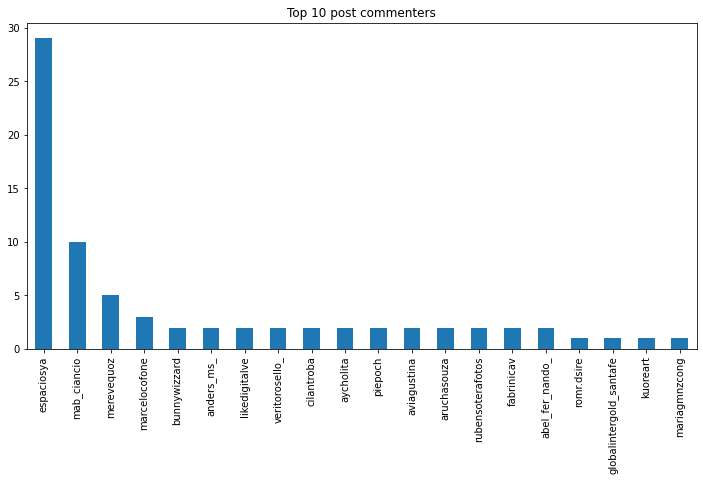

In [17]:
df_commenters['username'].value_counts()[:20].plot(kind='bar', figsize=(12,6), title='Top 10 post commenters')

# **NUMERO DE COMENTARIOS POR DIA**

In [31]:
# Converts date from unix time to YYYY-MM-DD hh24:mm:ss
df_commenters.created_at = pd.to_datetime(df_commenters.created_at, unit='s')
df_commenters.created_at_utc = pd.to_datetime(df_commenters.created_at_utc, unit='s')

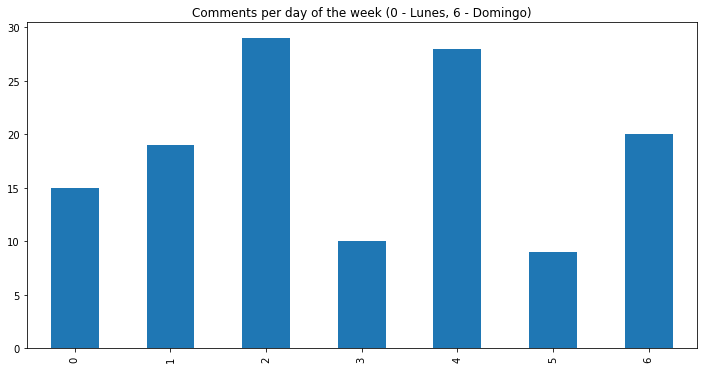

In [32]:
df_commenters.created_at_ba.dt.weekday.value_counts().sort_index().plot(kind='bar', figsize=(12,6), title='Comments per day of the week (0 - Lunes, 6 - Domingo)')

In [25]:
import calendar
print('ayuda: orden de los días segun python')
j = 0
for i in calendar.day_name:
    print(j,'-',i)
    j+=1

ayuda: orden de los días segun python
0 - Monday
1 - Tuesday
2 - Wednesday
3 - Thursday
4 - Friday
5 - Saturday
6 - Sunday


**NUMEROS DE COMENTARIOS HECHOS POR HORA**

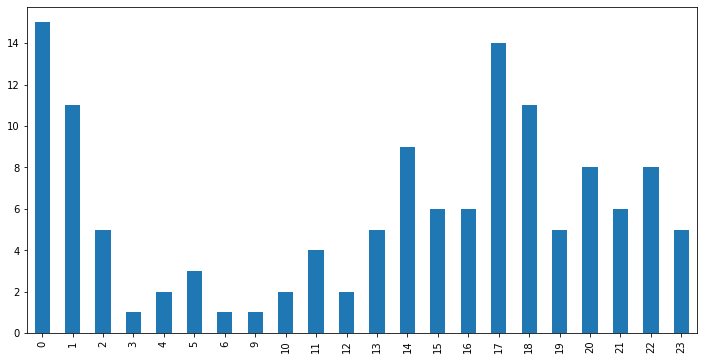

In [20]:
df_commenters.created_at_utc.dt.hour.value_counts().sort_index().plot(kind='bar', figsize=(12,6))

# **NUMERO DE COMENTARIOS CREADOS POR HORA EN HORARIO DE BUENOS AIRES**

In [28]:
 # Create a column to show when a a comment was created in Buenos Aires time
df_commenters['created_at_ba'] = df_commenters.created_at_utc.dt.tz_localize('UTC').dt.tz_convert('America/Buenos_Aires')

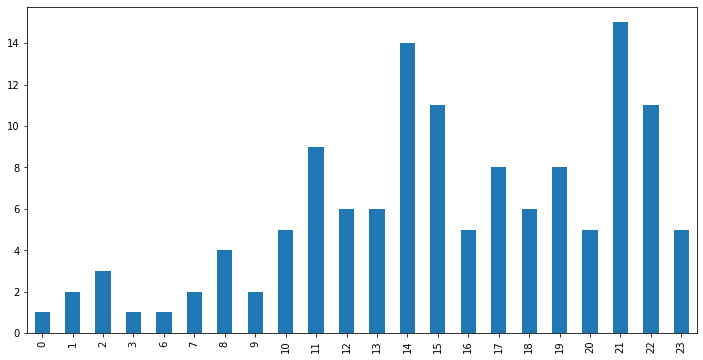

In [29]:
df_commenters.created_at_ba.dt.hour.value_counts().sort_index().plot(kind='bar', figsize=(12,6))

**dfs**

In [ ]:
df_commenters.to_csv('comments_1/9/20.csv')

In [ ]:
df_likers.to_csv('likes_1/9/20.csv')

In [ ]:
df_commenters.head()